In [13]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Database Connection & Data Reading
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="hospital_management" 
)

# Fetch Data
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM hms_insurance_claims_classification")
myresult = mycursor.fetchall()
columns = [column[0] for column in mycursor.description]
df = pd.DataFrame(myresult, columns=columns)
mydb.close()

## Step 1: Dataset Overview

In [14]:
# Step 1: Dataset Overview
print("Dataset Overview:")
print(df.info())
print(df.describe())
print(df.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Claim_ID                 5000 non-null   object 
 1   Patient_Age              5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Pre_existing_Conditions  5000 non-null   object 
 4   Claim_Type               5000 non-null   object 
 5   Claim_Amount             5000 non-null   float64
 6   Hospital_Type            5000 non-null   object 
 7   Treatment_Started        5000 non-null   object 
 8   Hospital_Stay_Duration   5000 non-null   int64  
 9   Insurance_Coverage       5000 non-null   float64
 10  Payment_Method           5000 non-null   object 
 11  Previous_Claims          5000 non-null   int64  
 12  Claim_Date               5000 non-null   object 
 13  Claim_Status             5000 non-null   int64  
dtypes: flo

In [22]:
import mysql.connector
import pandas as pd

# Connect to the database
try:
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="root",
        database="hospital_management"
    )
    mycursor = mydb.cursor()

    # Fetch data from insurance claims table
    mycursor.execute("SELECT * FROM hms_insurance_claims_classification")
    myresult1 = mycursor.fetchall()
    column_names1 = [column[0] for column in mycursor.description]

    if myresult1:  # Ensure data is retrieved
        insurance_claims_df = pd.DataFrame(myresult1, columns=column_names1)
    else:
        print("No data found in 'hms_insurance_claims_classification'")
        insurance_claims_df = pd.DataFrame(columns=column_names1)

    # Close connection
    mydb.close()

except mysql.connector.Error as err:
    print(f"Error: {err}")
    insurance_claims_df = None

# Check if DataFrame is successfully created
if insurance_claims_df is not None and not insurance_claims_df.empty:
    print("Dataset Overview:")
    print(insurance_claims_df.info())
    print(insurance_claims_df.describe())
    print("\nMissing Values:\n", insurance_claims_df.isnull().sum())
else:
    print("Failed to load the dataset.")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Claim_ID                 5000 non-null   object 
 1   Patient_Age              5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Pre_existing_Conditions  5000 non-null   object 
 4   Claim_Type               5000 non-null   object 
 5   Claim_Amount             5000 non-null   float64
 6   Hospital_Type            5000 non-null   object 
 7   Treatment_Started        5000 non-null   object 
 8   Hospital_Stay_Duration   5000 non-null   int64  
 9   Insurance_Coverage       5000 non-null   float64
 10  Payment_Method           5000 non-null   object 
 11  Previous_Claims          5000 non-null   int64  
 12  Claim_Date               5000 non-null   object 
 13  Claim_Status             5000 non-null   int64  
dtypes: flo

In [23]:
import pandas as pd

# Data Quality Report (DQR)
def generate_dqr(df):
    dqr = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Total Values": len(df),
        "Missing Values": df.isnull().sum().values,
        "Unique Values": df.nunique().values,
        "Minimum Value": [df[col].min() if df[col].dtype != 'O' else None for col in df.columns],
        "Maximum Value": [df[col].max() if df[col].dtype != 'O' else None for col in df.columns],
        "Mean Value": [df[col].mean() if df[col].dtype != 'O' else None for col in df.columns]
    })
    return dqr

# Generate DQR for the Dataset
dqr_report = generate_dqr(insurance_claims_df)
print("Data Quality Report:\n")
print(dqr_report)

Data Quality Report:

                Column Name Data Type  Total Values  Missing Values  \
0                  Claim_ID    object          5000               0   
1               Patient_Age     int64          5000               0   
2                    Gender    object          5000               0   
3   Pre_existing_Conditions    object          5000               0   
4                Claim_Type    object          5000               0   
5              Claim_Amount   float64          5000               0   
6             Hospital_Type    object          5000               0   
7         Treatment_Started    object          5000               0   
8    Hospital_Stay_Duration     int64          5000               0   
9        Insurance_Coverage   float64          5000               0   
10           Payment_Method    object          5000               0   
11          Previous_Claims     int64          5000               0   
12               Claim_Date    object          5000    

C:\Users\kdine\AppData\Local\Temp\ipykernel_12224\450066285.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Claim_Status", data=insurance_claims_df, palette="viridis")


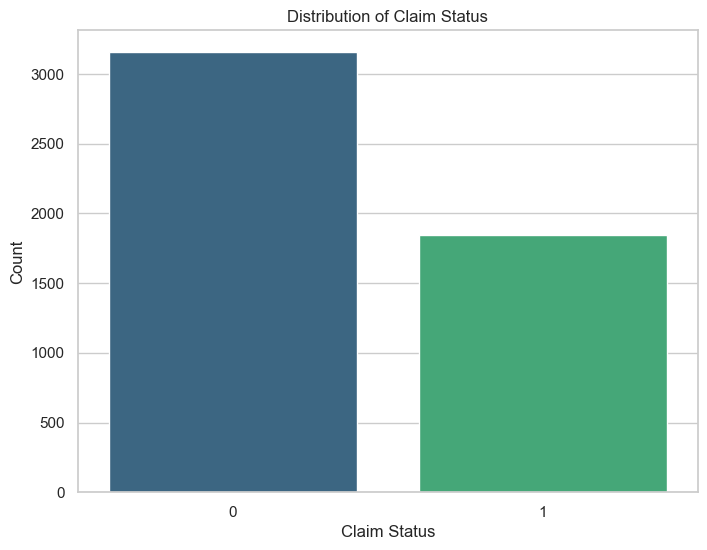

C:\Users\kdine\AppData\Local\Temp\ipykernel_12224\450066285.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=insurance_claims_df, palette="Set2")


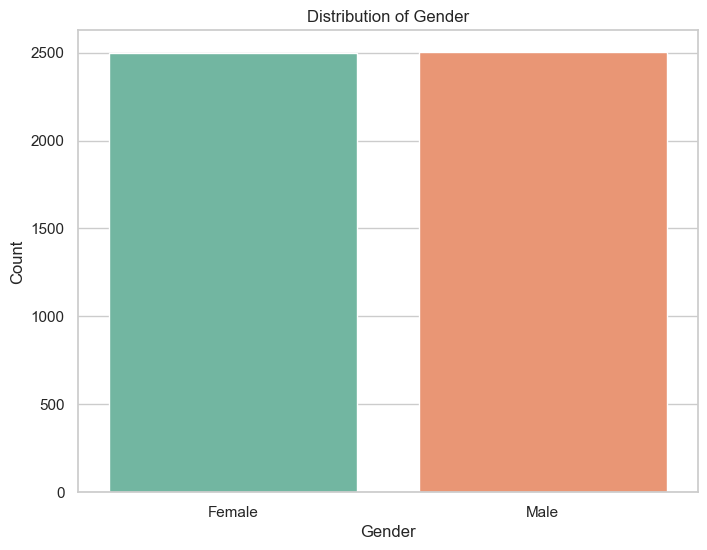

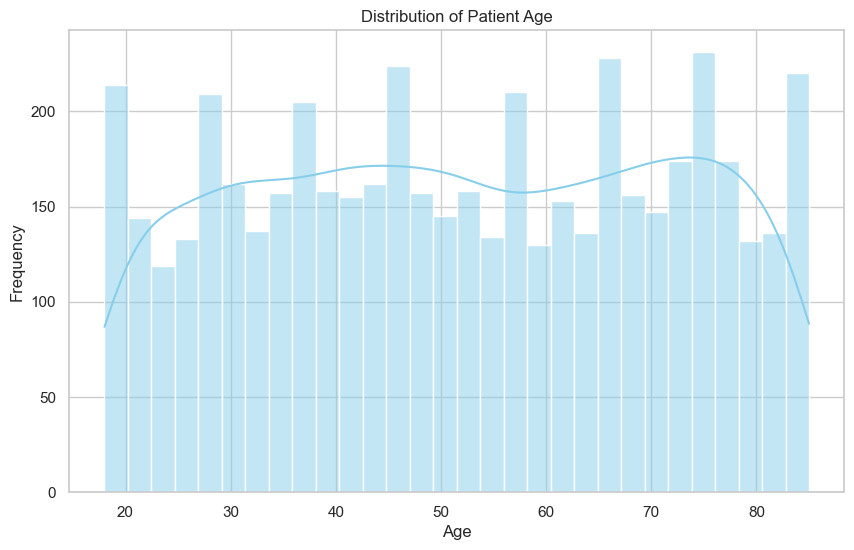

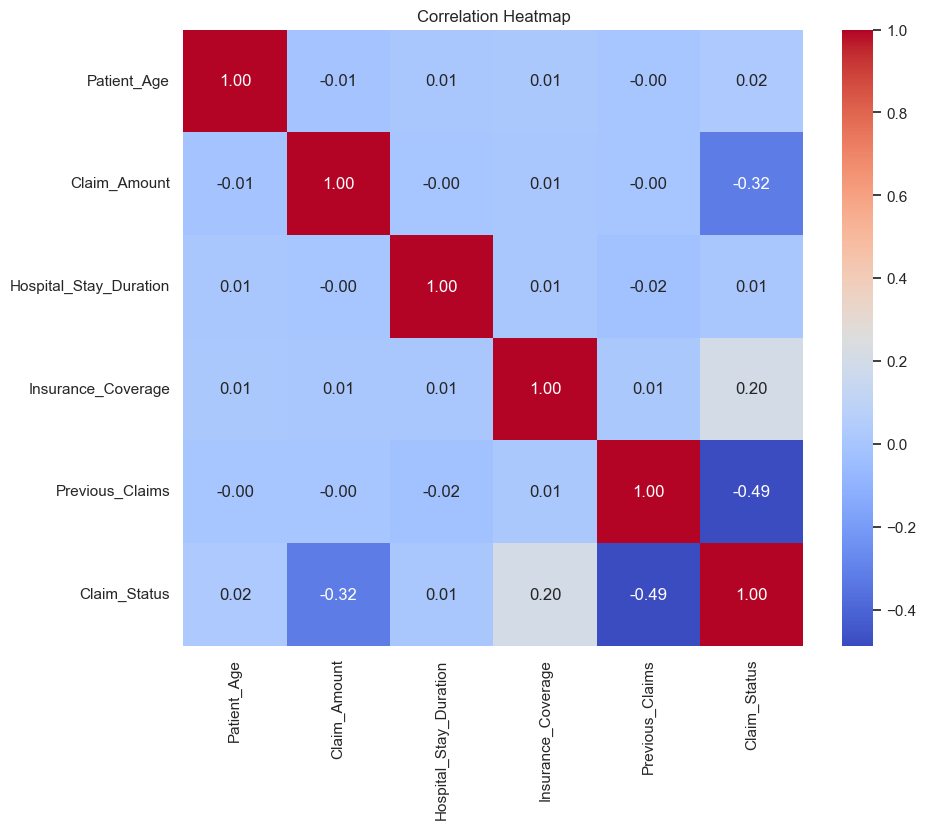

In [24]:
# Set plot style
sns.set(style="whitegrid")

# Count Plot for Target Variable (Claim_Status)
plt.figure(figsize=(8, 6))
sns.countplot(x="Claim_Status", data=insurance_claims_df, palette="viridis")
plt.title("Distribution of Claim Status")
plt.xlabel("Claim Status")
plt.ylabel("Count")
plt.show()

# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", data=insurance_claims_df, palette="Set2")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(insurance_claims_df["Patient_Age"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Patient Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = insurance_claims_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Step 4: Handling Missing Values and Encoding Categorical Variables



In [25]:
# Checking Missing Values
print("Missing Values before Handling:\n")
print(insurance_claims_df.isnull().sum())

# Encoding Categorical Variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_columns = ["Gender", "Pre_existing_Conditions", "Claim_Type", "Hospital_Type", "Treatment_Started", "Payment_Method"]

for column in categorical_columns:
    insurance_claims_df[column] = encoder.fit_transform(insurance_claims_df[column])

# Checking Missing Values After Encoding
print("\nMissing Values after Handling:\n")
print(insurance_claims_df.isnull().sum())

# Display Dataset after Encoding
insurance_claims_df.head()


Missing Values before Handling:

Claim_ID                   0
Patient_Age                0
Gender                     0
Pre_existing_Conditions    0
Claim_Type                 0
Claim_Amount               0
Hospital_Type              0
Treatment_Started          0
Hospital_Stay_Duration     0
Insurance_Coverage         0
Payment_Method             0
Previous_Claims            0
Claim_Date                 0
Claim_Status               0
dtype: int64

Missing Values after Handling:

Claim_ID                   0
Patient_Age                0
Gender                     0
Pre_existing_Conditions    0
Claim_Type                 0
Claim_Amount               0
Hospital_Type              0
Treatment_Started          0
Hospital_Stay_Duration     0
Insurance_Coverage         0
Payment_Method             0
Previous_Claims            0
Claim_Date                 0
Claim_Status               0
dtype: int64


,Claim_ID,Patient_Age,Gender,Pre_existing_Conditions,Claim_Type,Claim_Amount,Hospital_Type,Treatment_Started,Hospital_Stay_Duration,Insurance_Coverage,Payment_Method,Previous_Claims,Claim_Date,Claim_Status
0,Claim_1,35,0,0,3,46826.67,1,1,14,77.45,1,0,2021-11-14,0
1,Claim_2,44,0,1,1,16222.06,0,0,1,94.98,2,4,2024-10-02,0
2,Claim_3,79,0,0,3,45993.83,0,1,10,70.57,1,0,2023-08-29,0
3,Claim_4,83,1,1,2,47945.94,0,0,17,99.93,2,2,2022-12-29,0
4,Claim_5,58,1,0,1,36170.22,0,1,16,68.55,1,5,2020-10-11,0


## Step 5: Splitting Dataset into Features and Target Variable

In [26]:
# Splitting Dataset into Features and Target Variable
X = insurance_claims_df.drop(["Claim_ID", "Claim_Status", "Claim_Date"], axis=1)  # Features
y = insurance_claims_df["Claim_Status"]  # Target Variable

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

# Display First 5 Rows of Features
print("\nFeatures (X):")
print(X.head())

# Display First 5 Rows of Target
print("\nTarget (y):")
print(y.head())


Shape of Features (X): (5000, 11)
Shape of Target (y): (5000,)

Features (X):
   Patient_Age  Gender  Pre_existing_Conditions  Claim_Type  Claim_Amount  \
0           35       0                        0           3      46826.67   
1           44       0                        1           1      16222.06   
2           79       0                        0           3      45993.83   
3           83       1                        1           2      47945.94   
4           58       1                        0           1      36170.22   

   Hospital_Type  Treatment_Started  Hospital_Stay_Duration  \
0              1                  1                      14   
1              0                  0                       1   
2              0                  1                      10   
3              0                  0                      17   
4              0                  1                      16   

   Insurance_Coverage  Payment_Method  Previous_Claims  
0               77.45  

## Step 6: Encoding Categorical Features

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Columns
categorical_cols = ["Gender", "Pre_existing_Conditions", "Claim_Type", "Hospital_Type", "Treatment_Started", "Payment_Method"]

label_encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

print("Categorical Features After Encoding:")
print(X[categorical_cols].head())


Categorical Features After Encoding:
   Gender  Pre_existing_Conditions  Claim_Type  Hospital_Type  \
0       0                        0           3              1   
1       0                        1           1              0   
2       0                        0           3              0   
3       1                        1           2              0   
4       1                        0           1              0   

   Treatment_Started  Payment_Method  
0                  1               1  
1                  0               2  
2                  1               1  
3                  0               2  
4                  1               1  


## Step 7: Splitting Dataset into Train and Test Sets

In [28]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (4000, 11)
Testing Set Shape: (1000, 11)


## Step 8: Feature Scaling (Normalization)

In [29]:
from sklearn.preprocessing import StandardScaler

# Applying Standard Scaling on Training and Testing Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("After Scaling - Training Set:")
print(X_train[:5])

print("\nAfter Scaling - Testing Set:")
print(X_test[:5])


After Scaling - Training Set:
[[-0.13581824 -1.00250313 -1.01359237 -1.33336347 -0.91027225 -1.01511421
  -0.973842   -1.66443457 -1.18144836 -1.19268014  0.30345105]
 [ 1.0974915  -1.00250313 -1.01359237 -0.43998761  0.93369916 -1.01511421
  -0.973842    1.32212243 -1.01661739  0.03625354 -1.45738676]
 [-1.72884332  0.99750312  0.98658991  0.45338825  1.33689029  0.98511083
   1.02686062 -0.78603545 -0.57040135  0.03625354  1.47734292]
 [ 1.55998266  0.99750312  0.98658991  0.45338825  1.03507017 -1.01511421
   1.02686062 -1.31307492 -1.00420335 -1.19268014 -1.45738676]
 [ 1.14887941  0.99750312 -1.01359237  1.34676411 -0.16625411 -1.01511421
   1.02686062  0.61940314 -1.40007353 -1.19268014 -1.45738676]]

After Scaling - Testing Set:
[[ 1.25165522 -1.00250313 -1.01359237 -0.43998761  1.0570887   0.98511083
   1.02686062  0.09236367  0.51927616  0.03625354  0.30345105]
 [ 1.20026732 -1.00250313  0.98658991 -0.43998761  0.52176104  0.98511083
  -0.973842    1.67348208 -0.94558145 -1.19

## STEP 9: Model Building and Training

✅ Model Accuracy: 0.95

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       633
           1       0.90      0.97      0.93       367

    accuracy                           0.95      1000
   macro avg       0.94      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



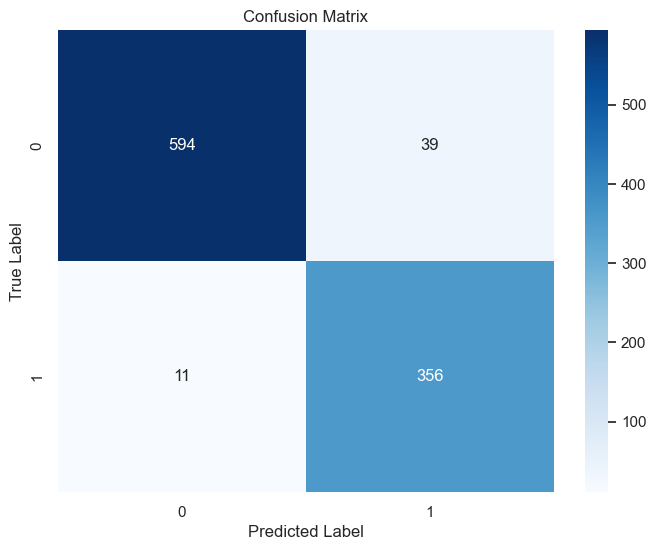

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model Training
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", accuracy)

# Classification Report
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## STEP 10: Model Evaluation and Performance Metrics

🌟 ROC-AUC Score: 0.9542079367744103


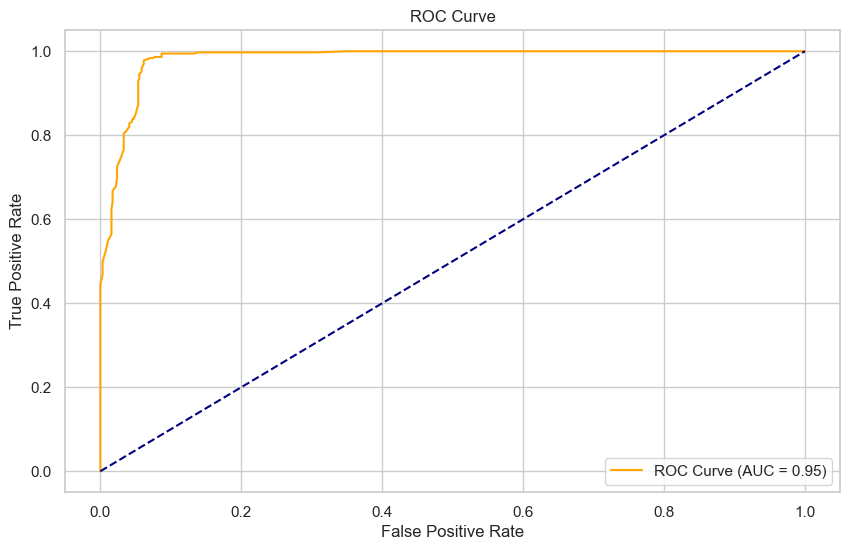

C:\Users\kdine\AppData\Local\Temp\ipykernel_12224\1908223218.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.feature_importances_, y=X.columns, palette="viridis")


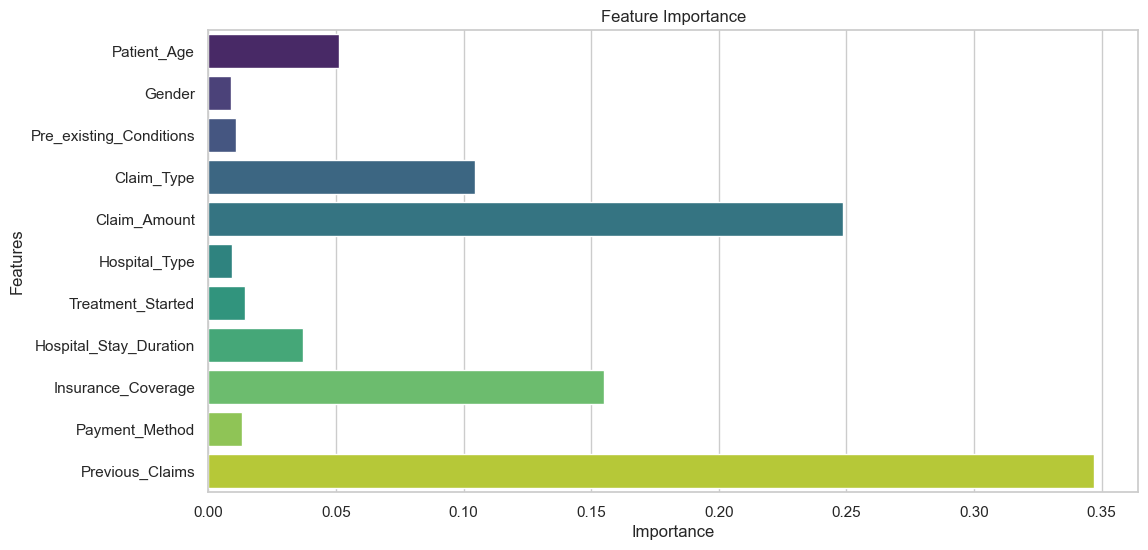

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC-AUC Score
auc_score = roc_auc_score(y_test, y_pred)
print("🌟 ROC-AUC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=model.feature_importances_, y=X.columns, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


## STEP 11: Hyperparameter Tuning Using GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

# Defining Parameters for Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV Implementation
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("🎯 Best Parameters:", grid_search.best_params_)

# Best Model
best_model = grid_search.best_estimator_

# Accuracy of Best Model
best_accuracy = best_model.score(X_test, y_test)
print("🔥 Best Model Accuracy:", best_accuracy)


🎯 Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
🔥 Best Model Accuracy: 0.942


## STEP 12: Saving the Model and Deployment Using Joblib

In [33]:
import joblib

# Saving the Best Model
joblib.dump(best_model, 'Insurance_Claim_Prediction_Model.pkl')
print("✅ Model Saved Successfully!")

# Loading the Model
loaded_model = joblib.load('Insurance_Claim_Prediction_Model.pkl')

# Testing the Loaded Model
test_prediction = loaded_model.predict(X_test)
print("📌 Sample Prediction:", test_prediction[:5])

# Final Accuracy
final_accuracy = loaded_model.score(X_test, y_test)
print("🎯 Final Model Accuracy After Deployment:", final_accuracy)


✅ Model Saved Successfully!
📌 Sample Prediction: [0 0 0 0 0]
🎯 Final Model Accuracy After Deployment: 0.942


## STEP 13: Model Evaluation Metrics (Accuracy, Precision, Recall, F1 Score for Classification Models)


✅ Logistic Regression Metrics
Accuracy: 0.8186666666666667
Precision: 0.7878787878787878
Recall: 0.7001795332136446
F1 Score: 0.7414448669201521
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       943
           1       0.79      0.70      0.74       557

    accuracy                           0.82      1500
   macro avg       0.81      0.79      0.80      1500
weighted avg       0.82      0.82      0.82      1500



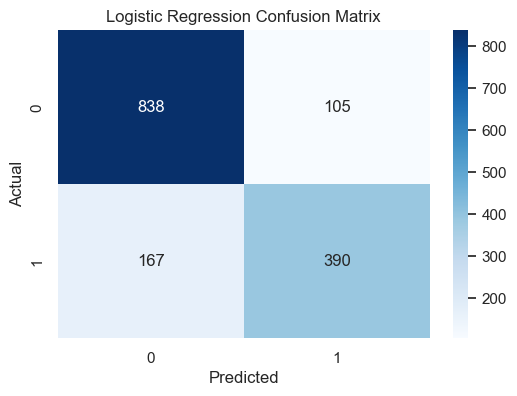


🌳 Decision Tree Classifier Metrics
Accuracy: 0.9353333333333333
Precision: 0.9136690647482014
Recall: 0.9120287253141831
F1 Score: 0.912848158131177
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       943
           1       0.91      0.91      0.91       557

    accuracy                           0.94      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.94      0.94      0.94      1500



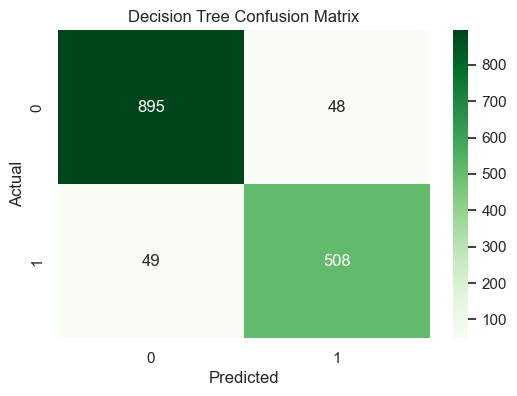


🌲 Random Forest Classifier Metrics
Accuracy: 0.9286666666666666
Precision: 0.89198606271777
Recall: 0.9192100538599641
F1 Score: 0.905393457117595
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       943
           1       0.89      0.92      0.91       557

    accuracy                           0.93      1500
   macro avg       0.92      0.93      0.92      1500
weighted avg       0.93      0.93      0.93      1500



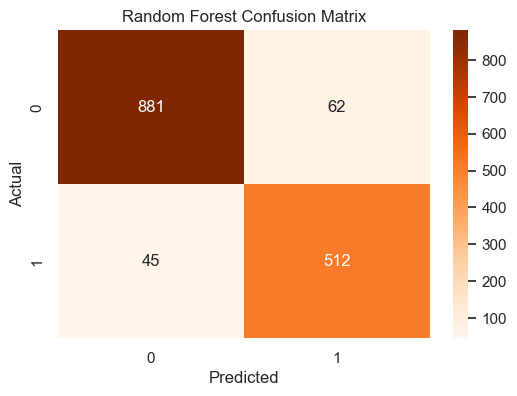


🔹 K-Means Clustering
Cluster Centers: [[ 6.67311695e-03 -1.08516202e-03  1.56555511e-02 -2.16143932e-02
  -8.81022407e-01 -2.45048687e-02  2.45449043e-04  1.05786277e-02
  -2.93539222e-02  2.32389858e-02  5.40135391e-03  8.78303550e-03
  -2.04472605e-03]
 [-6.89800991e-03  1.12173343e-03 -1.61831641e-02  2.23428271e-02
   9.10714039e-01  2.53307155e-02 -2.53721004e-04 -1.09351416e-02
   3.03431886e-02 -2.40221706e-02 -5.58338675e-03 -9.07903553e-03
   2.11363605e-03]]
Assigned Clusters for X_test: [0 0 0 0 1 0 0 0 1 0]


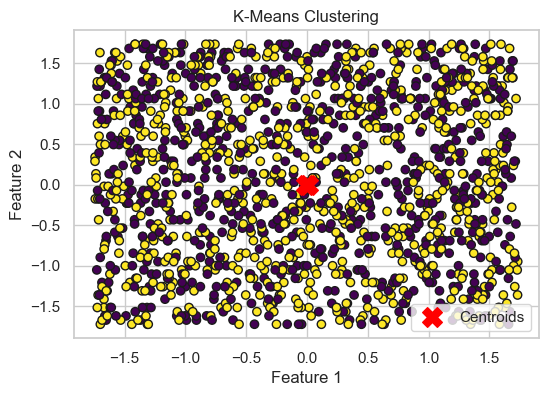

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n✅ Logistic Regression Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n🌳 Decision Tree Classifier Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🌲 Random Forest Classifier Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# K-Means Clustering
kmeans = KMeans(n_clusters=len(set(y_train)), random_state=42)
kmeans.fit(X_train)
kmeans_pred = kmeans.predict(X_test)

print("\n🔹 K-Means Clustering")
print("Cluster Centers:", kmeans.cluster_centers_)
print("Assigned Clusters for X_test:", kmeans_pred[:10])  # Display first 10 predictions

# Scatter plot for K-Means Clustering
plt.figure(figsize=(6, 4))
plt.scatter(X_test[:, 0], X_test[:, 1], c=kmeans_pred, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


📌 Comparison Table with Ranking
                 Model  Accuracy  Precision    Recall  F1 Score        Rank
0        Decision Tree  0.936000   0.935956  0.936000  0.935976  🥇 1st Best
1        Random Forest  0.932667   0.933424  0.932667  0.932889  🥈 2nd Best
2  Logistic Regression  0.818667   0.816767  0.818667  0.816209  🥉 3rd Best
3              K-Means  0.487333   0.519775  0.487333  0.495966         4th


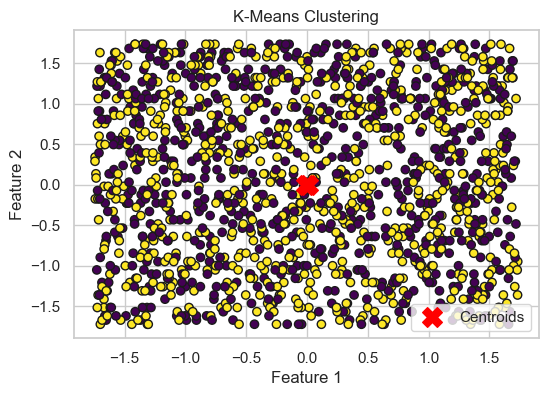

In [39]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# K-Means Clustering
kmeans = KMeans(n_clusters=len(set(y_train)), random_state=42)
kmeans.fit(X_train)
kmeans_pred = kmeans.predict(X_test)

# Store the evaluation metrics in a dictionary
model_metrics = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "K-Means"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, kmeans_pred)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log, average='weighted'),
        precision_score(y_test, y_pred_dt, average='weighted'),
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, kmeans_pred, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, y_pred_log, average='weighted'),
        recall_score(y_test, y_pred_dt, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, kmeans_pred, average='weighted')
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_log, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, kmeans_pred, average='weighted')
    ],
}

# Convert dictionary into DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Add Rank column based on Accuracy
metrics_df["Rank"] = metrics_df["Accuracy"].rank(ascending=False).astype(int)

# Replace Rank with labels
metrics_df["Rank"] = metrics_df["Rank"].replace({1: "🥇 1st Best", 2: "🥈 2nd Best", 3: "🥉 3rd Best", 4: "4th"})

# Sort the DataFrame by Rank
metrics_df = metrics_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Display Table
print("📌 Comparison Table with Ranking")
print(metrics_df)

# Scatter plot for K-Means Clustering
plt.figure(figsize=(6, 4))
plt.scatter(X_test[:, 0], X_test[:, 1], c=kmeans_pred, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
